In [116]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [118]:
# Import the planview csv file that is in ~/models/projects/Env_sensitivity/Planview_Cartopy/
SEL_RI = pd.read_csv('RIsland_planview_SEL.csv', delimiter = ',',na_values=" -inf",header=None)
SEL_VA = pd.read_csv('VAbeach_planview_SEL.csv', delimiter = ',',na_values=" -inf",header=None)

In [119]:
SEL_RI = SEL_RI.iloc[:,0:359] #get rid of wierd "-inf;" final column from obbprint
SEL_VA = SEL_VA.iloc[:,0:359] #get rid of wierd "-inf;" final column from obbprint

In [120]:
rowmax_RI = SEL_RI.max(0)
matrixmax_RI = rowmax_RI.max()
matrixmax_RI #this is correct

180.2102

In [121]:
rowmin_RI = SEL_RI.min(1)
matrixmin_RI = rowmin_RI.min()
matrixmin_RI 

-135.3528

In [122]:
rowmax_VA = SEL_VA.max(0)
matrixmax_VA = rowmax_VA.max()
matrixmax_VA

180.3721

In [123]:
rowmin_VA = SEL_VA.min(1)
matrixmin_VA = rowmin_VA.min()
matrixmin_VA 

-102.5418

In [6]:
#Ensure bottom limit of plot doesn't go to unreasonable numbers
if matrixmin_RI < 0:
    matrixmin_RI = 0
else:
    matrixmin_RI = matrixmin_RI
    
matrixmin_RI

0

In [124]:
if matrixmin_VA < 0:
    matrixmin_VA = 0
else:
    matrixmin_VA = matrixmin_VA
    
matrixmin_VA

0

The peregrine run went out to 60 km, so N to S or E to W span 120 km 
So 120e3 meters / 360 columns (longitudes), means each column is 333 m away from the adjacent ones.
Similarly, 120e3 meters / 358 rows (latitudes), means each row is 335 m away from the adjacent ones.

Make a lat lon grid like "-115 + (2000/111120)" where -115 is the central lat, 2000 is the number of meters for each grid spacing, and 111120 is the number of meters in one degree of lat or lon

In [7]:
359*333 #the number of meters from North to South of our goal map

119547

In [8]:
359*335 #the number of meters from West to East of our goal map

120265

In [9]:
# Make a lat/lon array centered at: lon -69d42.331m, lat 41d25.292m (RI) and lon -75d29.498m, lat 36d53.7772m (VA)
# 	41.4215333°, -069.7055167° (RI)
# 	36.8962867°, -075.4916333° (VA)

# Farthest West side of the map will be
Wgap = 119547/2/111120 #degrees away from center

In [10]:
RIlon = -71.22270
RIlat = 41.08776

VAlon = -75.49163
VAlat = 36.89629

In [103]:
RIw = RIlon - Wgap #western border of the grid at RIsland
VAw = VAlon - Wgap #western border of the grid at VAbeach
RIe = RIlon + Wgap
VAe = VAlon + Wgap

In [104]:
# Farthest South limit of the map will be
Sgap = 120265/2/111120 #degrees away from center

In [105]:
RIs = RIlat - Sgap #southern border of the grid at RIsland
VAs = VAlat - Sgap #southern border of the grid at VAbeach
RIn = RIlat + Sgap
VAn = VAlat + Sgap

In [106]:
lonRI = np.arange(0,119547,333)/111120 + RIw
#latitude from 0 to 60 km in 166 steps, divided by number of degrees in each meter, plus the starting point on the map (the bottom left corner)
lonVA = np.arange(0,119547,333)/111120 + VAw 

latRI = np.arange(0,120265,335)/111120 + RIs
latVA = np.arange(0,120265,335)/111120 + VAs

latRI1,lonRI1 = np.meshgrid(latRI,lonRI)
latVA1,lonVA1 = np.meshgrid(latVA,lonVA)

In [15]:
np.shape(latRI1) #Check that there are 4 matrices of latRI, lonRI, latVA, and lonVA as 359x360

(359, 359)

In [29]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [30]:
def make_map(projection=ccrs.PlateCarree(), figsize=(5, 5)):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw={"projection": projection})
    return fig, ax

Decide which SEL thresholds LEVELS to use in the next part of code:

Low Freq MarMams PTS & TTS in SELw,24hr = 168 & 183; in SEL3500 = 147.6 & 132.6

Mid Freq MarMams PTS & TTS in SELw,24hr = 170 & 185; in SEL3500 = 149.6 & 134.6

High Freq MarMams PTS & TTS in SELw,24hr = 140 & 155; in SEL3500 = 119.6 & 104.6

Phocid PTS & TTS in SELw,24hr = 170 & 185; in SEL3500 = 149.6 & 134.6


In [18]:
PTS = 147.6
TTS = 132.6

In [27]:
import contextily as ctx
import geopandas as gpd
import rasterio as rio
import mplleaflet as mpll

w: -71.472667
s: 41.772414
e: -71.3736135
n: 41.861571
place: Providence, Providence County, Rhode Island, United States of America
zoom: 13
n_tiles: 1


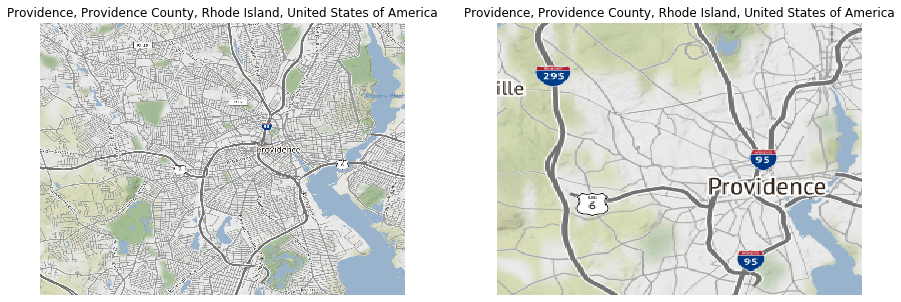

In [39]:
loc = ctx.Place("providence", zoom_adjust=0)
for attr in ["w", "s", "e", "n", "place", "zoom", "n_tiles"]:
    print("{}: {}".format(attr, getattr(loc, attr)))

# Show the map
im1 = loc.im

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ctx.plot_map(loc, ax=axs[0])

loc2 = ctx.Place("providence", zoom=11) #eventually make loc2 VAbeach and loc1 RIsland
ctx.plot_map(loc2, ax=axs[1])

#option 1 problem --> no bathymetry, and how to pick my origin as the middle spot without a city name???

In [20]:
#OPTION 2
# From folium OHW19 tutorial

import folium

lon, lat = RIlon, RIlat
m = folium.Map(location=[lat, lon], zoom_start=17)
#folium.Marker(location=[lat, lon], popup='You are here!').add_to(m) # Makes a marker for label at origin
m

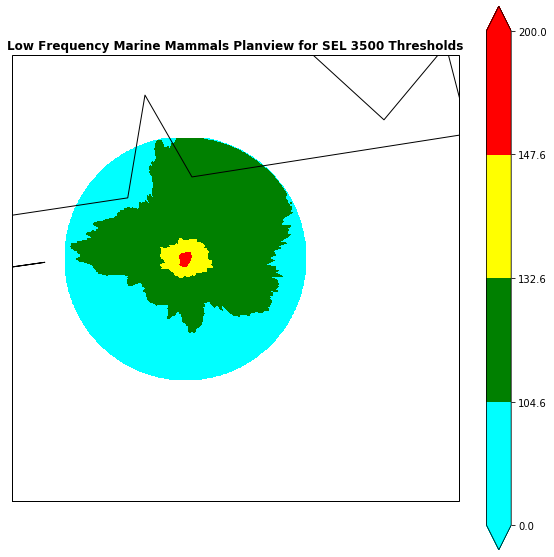

In [33]:
#OPTION 3

fig, ax = make_map(projection=ccrs.PlateCarree(), figsize=(10, 10))

#!!!!!!!!!!!! use contextily to make a better background !!!!!!!!!!!!!!!

#ax.stock_img() #makes crappy google earth ish kind of background on the map
ax.set_extent([-72,-70,40,42]) # Sets bounding box of lats and lons
coastline = cfeature.GSHHSFeature(scale="coarse")
ax.add_feature(coastline)
#ax.coastlines(resolution="110m", color="k") #makes gray and white map
#ax.add_feature(cfeature.LAND, facecolor="0.75") #makes gray and white map

levels = [matrixmin,104.6,TTS,PTS,200] #104.6 is the lowest threashold of all SEL3500 TTS hearing group
#contains absurb upper and lower boundaries to make colors work
#final value can be matrixmax, but in this case the PTS value is higher than the max
#100 right now is arbitrary but works to show some of the bearing differences

RIsland = ax.contourf(lonRI1, latRI1, SEL, levels, colors=('cyan','g','yellow','red'), 
                      transform=ccrs.PlateCarree(), extend='both')

fig.colorbar(RIsland)
#ax.clabel(RIsland, fmt='%2.1f', colors='w', fontsize=14) #add contour labels if want that
ax.set_title('Low Frequency Marine Mammals Planview for SEL 3500 Thresholds',fontsize=12,ha='center', fontweight='bold')

# save the image
plt.savefig('RIsland_SEL_planview.png')

# Load into an interactive map online - doesn't have topography though
#mpll.show() --> planview is plotting over in Africa, though
# Show the online map here in this notebook
#mpll.display()

In [22]:
#OPTION 4
# Use WOA for the bathymetry
# https://ocefpaf.github.io/python4oceanographers/blog/2015/05/04/woa13/
# WOOPS - this is not bathy, it is salinity, etc. water features


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


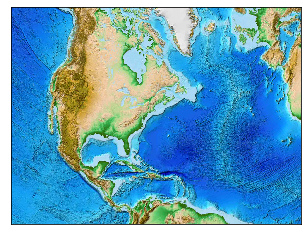

In [72]:
#OPTION 5 
# etopo is in basemap now
# https://matplotlib.org/basemap/users/geography.html (see etopo())

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=60,lat_0=40,lon_0=-70.)
m.etopo()
plt.show()

In [91]:
# OPTION 6
# Filipe's shit

# https://nbviewer.jupyter.org/github/ocefpaf/PIRATA/blob/master/CTD-PIRATA-Processing.ipynb

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from palettable import colorbrewer

LAND = colorbrewer.get_map("Greens", "sequential", 9)
OCEAN = colorbrewer.get_map("Blues", "sequential", 9, reverse=True)
LAND_OCEAN = np.array(OCEAN.mpl_colors + LAND.mpl_colors)
#set zoom level for the tiles
z = 10 

def make_map_F(extent, figsize=(12, 12), projection=ccrs.PlateCarree()): #Filipe's make_map version
    fig, ax = plt.subplots(
        figsize=figsize, subplot_kw={"projection": projection}
    )
    ax.set_extent(extent)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.ylines = gl.xlines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.coastlines(resolution="50m")
    return fig, ax


def add_etopo2(extent, ax, levels=None):
    import iris

    url = (
        "http://gamone.whoi.edu/thredds/dodsC/usgs/data0/bathy/ETOPO2v2c_f4.nc"
        #f"https://maps.heigit.org/openmapsurfer/tiles/roads/webmercator/{z}/{RIlon}/{RIlat}.png"
        #f"https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{RIlon}/{RIlat}" #this needs ESRI security token to access
    )
    cube = iris.load_cube(url)
    lon = iris.Constraint(x=lambda cell: extent[0] <= cell <= extent[1])
    lat = iris.Constraint(y=lambda cell: extent[2] <= cell <= extent[3])
    cube = cube.extract(lon & lat)
    lons = cube.coord("x").points
    lats = cube.coord("y").points
    if not levels:
        levels = sorted(
            set(
                np.r_[
                    np.linspace(cube.data.min(), -500, 2),  # bathy - makes blues bluer closer 2nd number is to 0
                    [-400, -145, -10],  # coast
                    np.linspace(100, cube.data.max(), 10),  # topo - 2nd number makes the land more bold
                ].astype(int)
            )
        )

    ax.contourf(
        lons,
        lats,
        cube.data,
        levels=levels,
        colors=LAND_OCEAN,
        zorder=0,
        alpha=0.65,
    )



Text(0.5, 1.0, 'Low Frequency Marine Mammals Planview for SEL 3500 Thresholds')

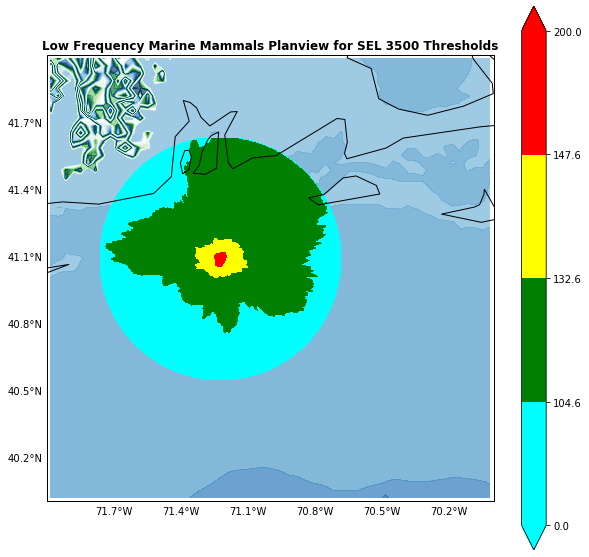

In [90]:
extent = [-72,-70,40,42]

fig, ax = make_map_F(extent,projection=ccrs.PlateCarree(), figsize=(10, 10))
add_etopo2(extent, ax, levels=None)

levels = [matrixmin_RI,104.6,TTS,PTS,200] 

RIsland = ax.contourf(lonRI1, latRI1, SEL_RI, levels, colors=('cyan','g','yellow','red'), 
                      transform=ccrs.PlateCarree(), extend='both')

fig.colorbar(RIsland)
#ax.clabel(RIsland, fmt='%2.1f', colors='w', fontsize=14) #add contour labels if want that
ax.set_title('Low Frequency Marine Mammals Planview for SEL 3500 Thresholds',fontsize=12,ha='center', fontweight='bold')


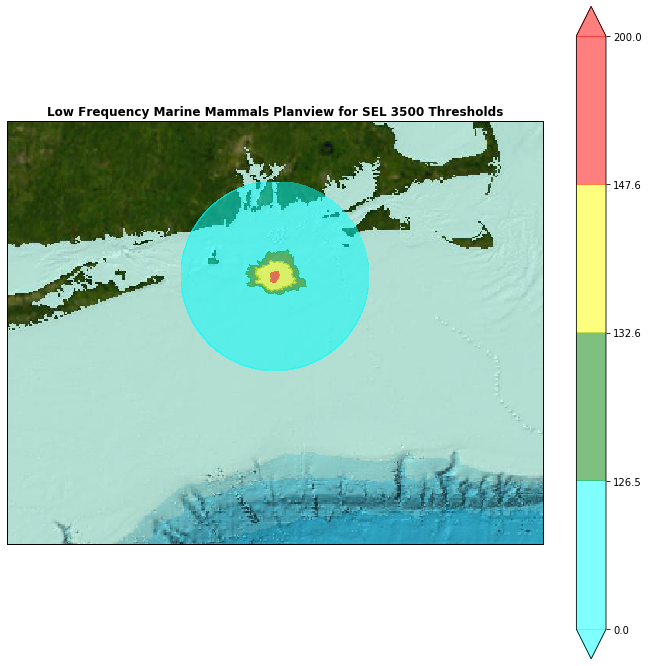

In [133]:
#OPTION 7
# From: https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html
# Using GEBCO downloaded image named RI.jpg in working directory
# https://www.gebco.net/data_and_products/gebco_web_services/web_map_service/mapserv?request=getmap&service=wms&BBOX=39,-73,42,-69&crs=EPSG:4326&format=image/jpeg&layers=gebco_latest&width=900&height=600&version=1.3.0

import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(12, 12))

fname = 'RI.jpg'
img_extent = (-73, -69, 39, 42)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())

levels = [matrixmin,126.5,TTS,PTS,200] #104.6 picked because it is the lowest SEL3500 value for any hearing group
ax.set_extent([RIw-1,RIe+1,RIs-1,RIn+0.35]) # Sets bounding box of lats and lons
RIsland = ax.contourf(lonRI1, latRI1, SEL_RI, levels, colors=('cyan','g','yellow','red'), alpha=0.5,
                      transform=ccrs.PlateCarree(), extend='both')

fig.colorbar(RIsland)
#ax.clabel(RIsland, fmt='%2.1f', colors='w', fontsize=14) #add contour labels if want that
ax.set_title('Low Frequency Marine Mammals Planview for SEL 3500 Thresholds',fontsize=12,ha='center', fontweight='bold')
plt.savefig('RIsland_SEL_planview.png')

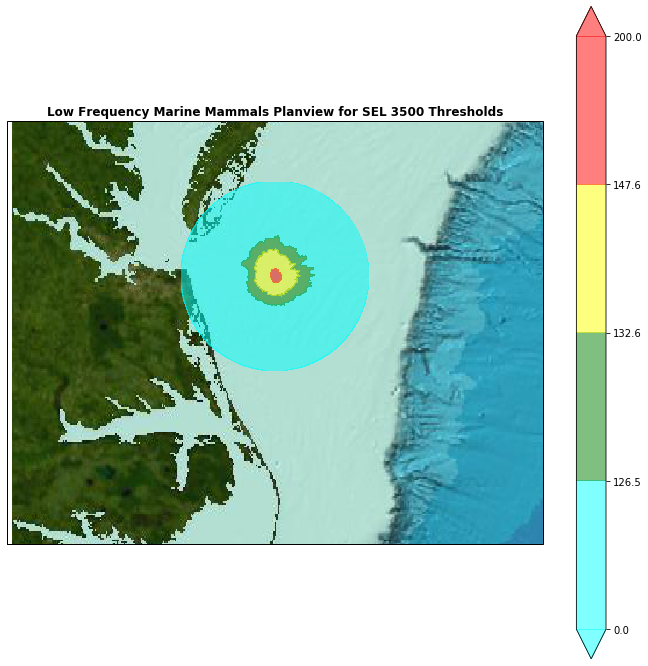

In [134]:
# Redo OPTION 8 for VAbeach
# https://www.gebco.net/data_and_products/gebco_web_services/web_map_service/mapserv?request=getmap&service=wms&BBOX=34,-77,40,-71&crs=EPSG:4326&format=image/jpeg&layers=gebco_latest&width=900&height=600&version=1.3.0

fig = plt.figure(figsize=(12, 12))

fname = 'VA.jpg'
img_extent = (-77, -71, 34, 40)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())

levels = [matrixmin,126.5,TTS,PTS,200] 
ax.set_extent([VAw-1,VAe+1,VAs-1,VAn+0.35]) # Sets bounding box of lats and lons
VAbeach = ax.contourf(lonVA1, latVA1, SEL_VA, levels, colors=('cyan','g','yellow','red'), alpha=0.5,
                      transform=ccrs.PlateCarree(), extend='both')

fig.colorbar(VAbeach)
ax.set_title('Low Frequency Marine Mammals Planview for SEL 3500 Thresholds',fontsize=12,ha='center', fontweight='bold')
plt.savefig('VAbeach_SEL_planview.png')
